In [27]:
import psycopg2
from psycopg2 import sql
import datetime
import calendar
import numpy as np
from random import *
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def credentials():
    conn = psycopg2.connect("""
    dbname='shop_data_analysis'
    user ='postgres'
    password='rabina00'
    host='localhost'
    port= '5432'
    """)
    return conn

In [3]:
def create_table():
    conn = credentials()
    cur = conn.cursor()
    cur.execute('CREATE TABLE If NOT EXISTS store(id serial PRIMARY KEY,date DATE,time TIME,day VARCHAR,itemid serial,quantity INTEGER,price REAL,typeid INTEGER,cusid INTEGER)')
    conn.commit()
    conn.close()

In [4]:
def insert_into_table(date,time,day,item_id,quantity,price,type_id,cus_id):
    conn = credentials()
    cur = conn.cursor()
    cur.execute('INSERT INTO store(date,time,day,itemid,quantity,price,typeid,cusid) VALUES (%s,%s,%s,%s,%s,%s,%s,%s)' ,(date,time,day,item_id,quantity,price,type_id,cus_id))
    conn.commit()
    conn.close()

In [5]:
def view_from_table():
    conn = credentials()
    cur = conn.cursor()
    cur.execute("SELECT * FROM store")
    rows = cur.fetchall()
    conn.close()
    return rows

In [6]:
def delete_from_table(id):
    conn = credentials()
    cur = conn.cursor()
    cur.execute("DELETE FROM store WHERE id=%s",(id,))
    conn.commit()
    conn.close()

In [7]:
# delete row
# delete_from_table(3)

In [8]:
def update_table(date,time,day,item_id,quantity,price,type_id,cus_id,id):
    conn = credentials()
    cur = conn.cursor()
    cur.execute("UPDATE store SET date=%s, time=%s,day=%s, itemid=%s, quantity=%s, price=%s, typeid=%s, cusid=%s WHERE id =%s",(date,time,day,item_id,quantity,price,type_id,cus_id,id))
    conn.commit()
    conn.close()

In [9]:
# udpate row
# update_table(date,time,day,103,60,43,8,13, 2 )

In [10]:
def get_column(col_name):
    conn = credentials()
    cur = conn.cursor()
    cur.execute(sql.SQL("SELECT {} from store").format(sql.Identifier(col_name)))
    rows = cur.fetchall()
    conn.close()
    return rows

In [11]:
# ----- Must run -----
create_table()
date = datetime.datetime.now().date()
time = datetime.datetime.now().time()

day_name= ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
my_date = date.today()
day = calendar.day_name[my_date.weekday()] 

In [ ]:
# ----- data input ------
# insert_into_table(date,time,day,103,55,35,4,13)
# insert_into_table(date,time,day,103,56,38,4,13)
# insert_into_table(date,time,day,103,58,38,4,13)
# insert_into_table(date,time,day,103,59,39,4,13)
# insert_into_table(date,time,day,103,60,44,4,13)
# insert_into_table(date,time,day,103,60,43,4,13)
# insert_into_table(date,time,day,103,62,44,4,13)

In [49]:
# insert_into_table(date,time,day,103,65,68,4,13)
# insert_into_table(date,time,day,103,63,66,4,13)
# insert_into_table(date,time,day,103,67,68,4,13)
# insert_into_table(date,time,day,103,64,65,4,13)
# insert_into_table(date,time,day,103,68,69,4,13)
# insert_into_table(date,time,day,103,62,66,4,13)
# insert_into_table(date,time,day,103,70,68,4,13)
# insert_into_table(date,time,day,103,66,65,4,13)
# insert_into_table(date,time,day,103,68,71,4,13)
# insert_into_table(date,time,day,103,67,67,4,13)
# insert_into_table(date,time,day,103,69,68,4,13)
# insert_into_table(date,time,day,103,71,70,4,13)

In [ ]:
# -- dummy data input ----------
# for i in range(100):
#     price = randint(100, 10000)
#     quantity = randint(5,30)
#     itemid = randint(101,130)
#     insert_into_table(date,time,day,itemid,quantity,price,4,13)

In [51]:
# ----- run to view data -----
# for row in view_from_table():
#     print(row)

In [13]:
# ------- run to calculate co. of correlation ------
price  = np.array([ x[0] for x in get_column('price')])
quantity  = np.array([ x[0] for x in get_column('quantity')])
itemid  = np.array([ x[0] for x in get_column('itemid')])
price = price*quantity
cor_1 = np.corrcoef(price,quantity)
cor_1 = cor_1[0].tolist()
cor_1 = round(cor_1[1],2)
print(cor_1)
cor_2 = np.corrcoef(price,itemid)
cor_2 = cor_2[0].tolist()
cor_2 = round(cor_2[1],2)
print(cor_2)
cor_3 = np.corrcoef(quantity,itemid)
cor_3 = cor_3[0].tolist()
cor_3 = round(cor_3[1],2)
print(cor_3)

0.95
0.23
0.38


In [105]:
x.corr()

,quantity,itemid
quantity,1.000000,0.381703
itemid,0.381703,1.000000


In [14]:
# ---- 3-multiple regression -----
r_123 = math.sqrt(((cor_1*cor_1)+(cor_2*cor_2)-(2*cor_1*cor_2*cor_3))/(1-(cor_3*cor_3)))
print(round(r_123,2))

0.96


# Simple Linear Regression

In [28]:
# Simple Linear Regression
price  = [ x[0] for x in get_column('price')]
quantity  = [ x[0] for x in get_column('quantity')]
itemid  = [ x[0] for x in get_column('itemid')]

price_pd = pd.Series(data=price)
quantity_pd = pd.Series(data=quantity)
itemid_pd = pd.Series(data=itemid)

# Create linear regression object
regr = LinearRegression()

In [20]:
print('price mean : ', round(price_pd.mean(),2))
print('quantity mean : ', round(quantity_pd.mean(),2))
print('itemid mean : ', round(itemid_pd.mean(),2))

price mean :  67.58
quantity mean :  66.67
itemid mean :  106.5


In [37]:
######### y = b0 + b1 * x1 Linear Regression
y = price_pd
x = pd.DataFrame({"quantity":quantity})

# Train the model using the training sets
print(regr.fit(x,y))

coef_1 = regr.coef_
inter_1 = regr.intercept_
print('coef',coef_1)
print('inter',inter_1)

input_quantity = int(input('Enter quantity'))
y = inter_1 +(input_quantity*coef_1[0])
print(round(y,2))

LinearRegression()
coef [0.47637795]
inter 35.82480314960629
69.17


In [41]:
######### y = b0 + b1 * x1 + b2 * x2  Linear Regression
y = price_pd
x = pd.DataFrame({"quantity":quantity,"itemid":itemid})

# Train the model using the training sets
print(regr.fit(x,y))

coef_1 = regr.coef_
inter_1 = regr.intercept_
print('coef',coef_1)
print('inter',inter_1)

input_quantity = int(input('Enter quantity'))
input_itemid = int(input('Enter itemid'))
y = inter_1 +(input_quantity*coef_1[0] + (input_itemid*coef_1[1]))
print(round(y,2))

LinearRegression()
coef [ 0.57183371 -0.19242668]
inter 49.954527876248775
80.31


# Logistic Regression
    - it is used to classify that which data belongs to which class.
    - eg. yes/no -> binary classification
        - a enquiry person will buy or not.

# Graph

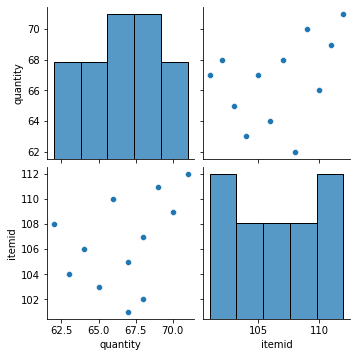

In [91]:
sns.pairplot(x)

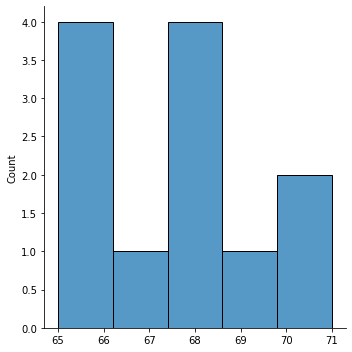

In [116]:
sns.displot(price_pd)

array([[<AxesSubplot:title={'center':'quantity'}>,
        <AxesSubplot:title={'center':'itemid'}>]], dtype=object)

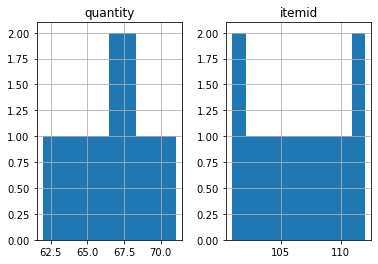

In [103]:
x.hist()

<AxesSubplot:>

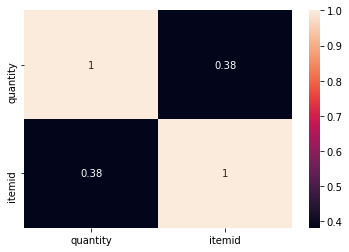

In [106]:
corr = x.corr()
sns.heatmap(corr, annot=True)